In [22]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
from liftpose.preprocess import add_roots, unNormalize, concat_dict
import liftpose.lifter.utils as utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load data and rescale

In [25]:
data_dir = '/data/LiftPose3D/fly_ventral_highres/data/'
        
#load predictions
data = torch.load(data_dir + '/test_results.pth.tar')
out = data['output']
inp = data['input']

#output
targets_1d = torch.load(data_dir + '/stat_3d.pth.tar')['targets_1d']
test_keypts = torch.load(data_dir + '/stat_3d.pth.tar')['LR_test']
test_keypts = np.concatenate([v for k,v in test_keypts.items()], 0)
out_mean = torch.load(data_dir + '/stat_3d.pth.tar')['mean']
out_std = torch.load(data_dir + '/stat_3d.pth.tar')['std']
offset_out = concat_dict(torch.load(data_dir + '/stat_3d.pth.tar')['offset'], 0)
offset_out = np.hstack((offset_out[:,15:],offset_out[:,15:]))
targets_1d = torch.load(data_dir + '/stat_3d.pth.tar')['targets_1d'] 
out = add_roots(out,targets_1d,len(out_mean))
out = unNormalize(out, out_mean, out_std)

out = utils.filter_data(out[:,:,None], window=3, order=2)[:,:,0]

#inputs
targets_2d = torch.load(data_dir + '/stat_2d.pth.tar')['targets_2d']    
inp_mean = torch.load(data_dir + '/stat_2d.pth.tar')['mean']
inp_std = torch.load(data_dir + '/stat_2d.pth.tar')['std']
offset_inp = concat_dict(torch.load(data_dir + '/stat_2d.pth.tar')['offset'])
inp = add_roots(inp,targets_2d,len(inp_mean))
inp = unNormalize(inp, inp_mean, inp_std)

inp /= 112
out /= 212
offset_inp /= 112
offset_out /= 212

offset = np.stack((offset_inp[:,::2],offset_inp[:,1::2],offset_out), axis=2)
poses = np.stack((inp[:,::2],inp[:,1::2],out), axis=2)

Projected traces

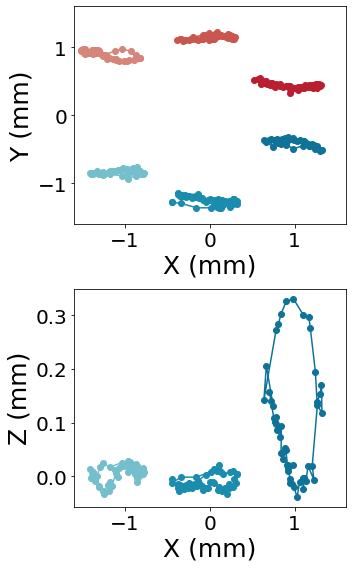

In [26]:
import yaml
par_data = yaml.full_load(open('param_FlyLimbTracker.yaml', "rb"))
colors = [[x / 255.0 for x in par_data["vis"]["colors"][i]] for i in par_data["vis"]["limb_id"]]

tint = [50,100]

fig = plt.figure(figsize=([5,8])) 
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

times = np.arange(tint[0],tint[1])

#plot projected tarsus coordinates
for i in [4,9,14,19,24,29]:
    ax1.plot(-poses[times,i,0],poses[times,i,1],'-o', c=colors[i]) 
       
for i in [4,9,14]:
    ax2.plot(-poses[times,i,0],poses[times,i,2] + offset_out[0,i] +0.05,'-o', c=colors[i])
        
ax1.set_xlabel('X (mm)', fontsize=25)
ax1.set_ylabel('Y (mm)', fontsize=25)
ax2.set_xlabel('X (mm)', fontsize=25)
ax2.set_ylabel('Z (mm)', fontsize=25)
ax1.set_xlim([-1.6, 1.6])
ax1.set_ylim([-1.6, 1.6])
ax2.set_xlim([-1.6, 1.6])
plt.tight_layout()
#plt.savefig('Figure_3G.png')

# Video

Projected traces

[animation.py:329]:DEBUG:frame size in pixels is 500 x 800
[animation.py:345]:INFO:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 500x800 -pix_fmt rgba -r 10 -i pipe: -vcodec h264 -pix_fmt yuv420p -y projected_traces.mp4


  0%|          | 0/100 [00:00<?, ?it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


  6%|▌         | 6/100 [00:00<00:01, 55.18it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 13%|█▎        | 13/100 [00:00<00:01, 59.19it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 19%|█▉        | 19/100 [00:00<00:01, 59.38it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 26%|██▌       | 26/100 [00:00<00:01, 59.88it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 33%|███▎      | 33/100 [00:00<00:01, 60.08it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 40%|████      | 40/100 [00:00<00:01, 59.70it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 46%|████▌     | 46/100 [00:00<00:00, 59.06it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 52%|█████▏    | 52/100 [00:00<00:00, 58.32it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 58%|█████▊    | 58/100 [00:00<00:00, 57.53it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 64%|██████▍   | 64/100 [00:01<00:00, 57.23it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 70%|███████   | 70/100 [00:01<00:00, 56.96it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 76%|███████▌  | 76/100 [00:01<00:00, 57.18it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 82%|████████▏ | 82/100 [00:01<00:00, 57.49it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 88%|████████▊ | 88/100 [00:01<00:00, 57.49it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


 94%|█████████▍| 94/100 [00:01<00:00, 57.17it/s]

[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.


100%|██████████| 100/100 [00:01<00:00, 57.94it/s]

[animation.py:386]:DEBUG:MovieWriter stderr:
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 -

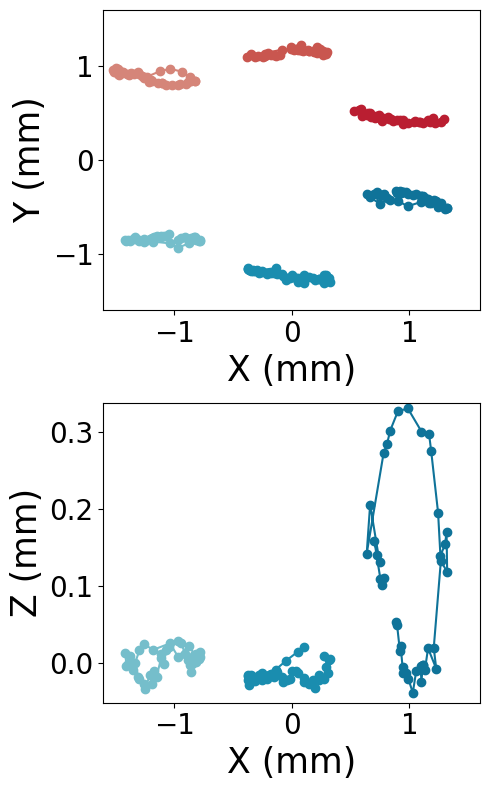

In [27]:
from matplotlib.animation import FFMpegWriter
from tqdm import tqdm

nframes = 100
w = 40

fig = plt.figure(figsize=([5,8]),dpi=100) 
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

times = np.arange(0,w)

l = {}
count = 0
for i in [4,9,14,19,24,29]:
    l[count], = ax1.plot(-poses[times,i,0], poses[times,i,1],'-o', color=colors[i]) 
    count+=1
       
for i in [4,9,14]: #plot projected tarsus coordinates
    l[count], = ax2.plot(-poses[times,i,0], poses[times,i,2] + offset_out[0,i] +0.05,'-o', color=colors[i])
    count+=1

ax1.set_xlabel('X (mm)', fontsize=25)
ax1.set_ylabel('Y (mm)', fontsize=25)
ax2.set_xlabel('X (mm)', fontsize=25)
ax2.set_ylabel('Z (mm)', fontsize=25)
ax1.set_xlim([-1.6, 1.6])
ax1.set_ylim([-1.6, 1.6])
ax2.set_xlim([-1.6, 1.6])
plt.tight_layout()
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

writer = FFMpegWriter(fps=10)
with writer.saving(fig, "projected_traces.mp4", 100):
    for t in tqdm(range(nframes)):
        
        if t-w<0:
            tint = [0, t]
        else:
            tint = [t-w, t]
            
        times = np.arange(tint[0], tint[1])
            
        count = 0
        for i in [4,9,14,19,24,29]:
            l[count].set_xdata(-poses[times,i,0])
            l[count].set_ydata(poses[times,i,1])
            count+=1
            
        for i in [4,9,14]:
            l[count].set_xdata(-poses[times,i,0])
            l[count].set_ydata(poses[times,i,2]+ offset_out[0,i] +0.05)
            count+=1
              
        writer.grab_frame()

[animation.py:329]:DEBUG:frame size in pixels is 1200 x 1200
[animation.py:345]:INFO:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1200x1200 -pix_fmt rgba -r 10 -i pipe: -vcodec h264 -pix_fmt yuv420p -y LP3D_prediction.mp4
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWriter.grab_frame: Grabbing frame.
[animation.py:358]:DEBUG:MovieWrit

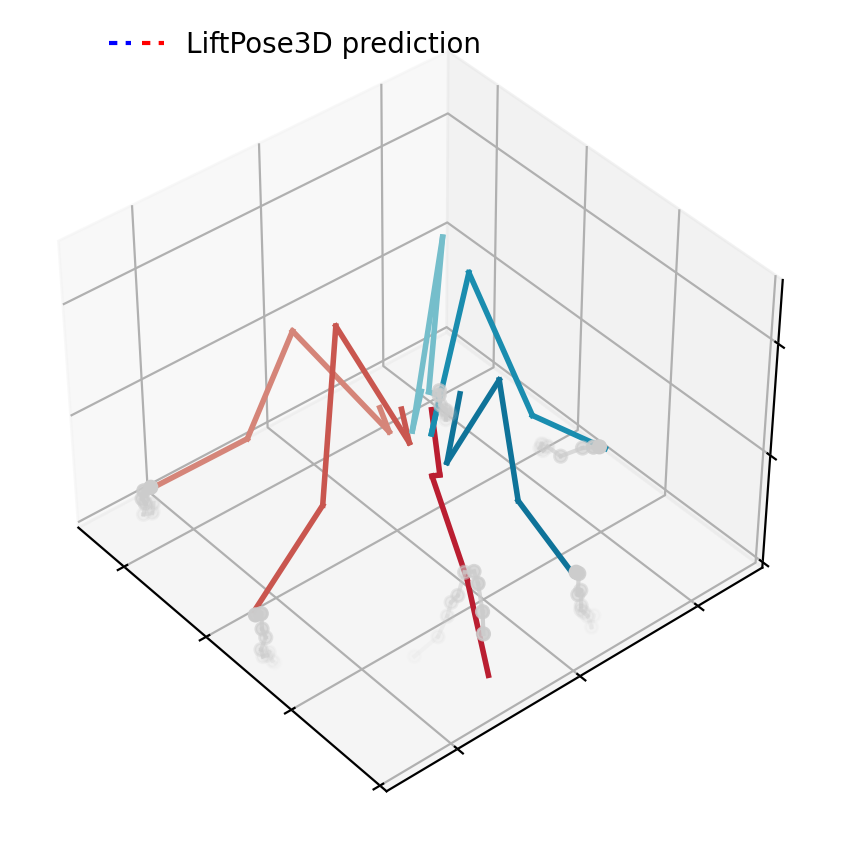

In [28]:
from liftpose.plot import plot_video_3d

poses += offset[0,:]

fig = plt.figure(figsize=plt.figaspect(1), dpi=200)
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.97)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=40, azim=140)

ax.set_xlim([0,3.5])
ax.set_ylim([0.5,3.5])
ax.set_zlim([0,0.5])

plot_video_3d(fig, ax, n=poses.shape[0], par=par_data, pred=poses, trailing=10, trailing_keypts=[4,9,14,19,24,29], fps=10)

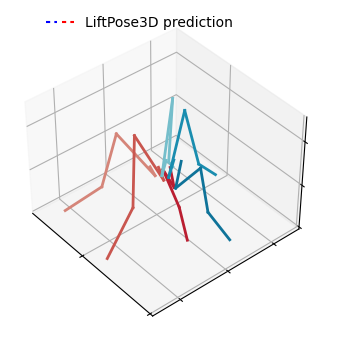

In [29]:
fig = plt.figure(figsize=plt.figaspect(1), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=40, azim=140)

from liftpose.plot import plot_pose_3d
t=50
ax.set_xlim([0,3.5])
ax.set_ylim([0.5,3.5])
ax.set_zlim([0,0.5])

plot_pose_3d(ax=ax, bones=par_data["vis"]["bones"],
             pred=poses[t], 
             normalize=False, 
             limb_id=par_data["vis"]["limb_id"], 
             colors=par_data["vis"]["colors"],
             axes=False,
             legend=True)

In [34]:
#!python fly_ventral_highres_make_video.py params.yaml
!ffmpeg -i cropped.mp4 -i LP3D_prediction.mp4 -filter_complex "[0:v]scale=-1:1200[v0];[v0][1:v]hstack=inputs=2" output.mp4 -y
!ffmpeg -i output.mp4 -i projected_traces.mp4 -filter_complex "[0:v]scale=-1:800[v0];[v0][1:v]hstack=inputs=2" output_2.mp4 -y
!ffmpeg -i arena.mp4 -i output_2.mp4 -filter_complex "[0:v]scale=2100:-1,pad='iw+mod(iw\,2)':'ih+mod(ih\,2)'[v0];[v0][1:v]vstack=inputs=2" video_9.mp4 -y

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'output.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf57.83.100
  Duration: 00:00:10.00, start: 0.000000, bitrate: 3599 kb/s
    Stream #0:0(und): Video: h264 (High) (avc1 / 0x31637661), yuv420p, 2400x1200, 3597 kb/s, 10 fps, 10 tbr, 10240 tbn, 20 tbc (default)
    Metadata:
      handler_name    : VideoHandler
Input #1, mov,mp4,m4a,3gp,3g2,mj2, from 'projected_traces.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf57.83.100
  Duration: 00:00:10.00, start: 0.000000, bitrate: 60 kb/s
    Stream #1:0(und): Video: h264 (High) (avc1 / 0x31637661), yuv420p, 500x800, 58 kb/s, 10 fps, 10 tbr, 10240 tbn, 20 tbc (default)
    Metadata:
      handler_name    : VideoHandler
Stream mapping:
  Stream #0:0 (h264) -> scale
  Stream #1:0 (h264) -> hstack:input1
  hstack -> Stream #0:0 

frame=  100 fps= 58 q=-1.0 Lsize=    3405kB time=00:00:09.70 bitrate=2875.6kbits/s speed=5.62x    
video:3403kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.059634%
[libx264 @ 0x561bec1ae340] frame I:1     Avg QP:16.60  size:135273
[libx264 @ 0x561bec1ae340] frame P:25    Avg QP:18.52  size: 54988
[libx264 @ 0x561bec1ae340] frame B:74    Avg QP:21.07  size: 26675
[libx264 @ 0x561bec1ae340] consecutive B-frames:  1.0%  0.0%  3.0% 96.0%
[libx264 @ 0x561bec1ae340] mb I  I16..4: 15.1% 71.2% 13.7%
[libx264 @ 0x561bec1ae340] mb P  I16..4:  0.2%  4.5%  0.4%  P16..4: 26.1% 14.0%  7.1%  0.0%  0.0%    skip:47.7%
[libx264 @ 0x561bec1ae340] mb B  I16..4:  0.0%  0.9%  0.0%  B16..8: 25.6%  7.4%  1.5%  direct: 3.2%  skip:61.4%  L0:47.3% L1:47.5% BI: 5.2%
[libx264 @ 0x561bec1ae340] 8x8 transform intra:83.8% inter:68.6%
[libx264 @ 0x561bec1ae340] coded y,uvDC,uvAC intra: 68.9% 4.8% 4.2% inter: 18.7% 0.7% 0.4%
[libx264 @ 0x561bec1ae340] i16 v,h,dc,p: 57% 28% 12%  3%
[li